### Importy

In [1]:
import os
os.chdir('d:/Projekty/LBN-INZ/CODE/model_training/')
print(os.getcwd())

d:\Projekty\LBN-INZ\CODE\model_training


In [5]:
import pandas as pd
import numpy as np
from scripts.essentials import *
from scripts.plots import *
import pickle

In [3]:
cols_news = ['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader',
       'mean_future','mean_influential', 'mean_trustworthy', 'mean_clickbait' 
         ]

### Połączenie News + FE

In [6]:
prefix = "BA"
df_news_path = "BA_full_agg_8.csv"

In [7]:
df_news = pd.read_csv("csv/"+prefix+"/"+df_news_path)
df_finance = pd.read_csv("csv/finance_all.csv")

połączenie z newsami + uzupełnienie braków

In [8]:
df_m = create_merged_df(df_finance, df_news, prefix)

dorobienie ramki bez weekendu

In [9]:
df_with_weekends = df_m.copy()
df_without_weekends = df_m.copy()

df_without_weekends = apply_weighted_weekend_news(df_without_weekends,'Date', cols_news, weights=[0.6,0.2,0.2])

wyliczenie cech

In [10]:
df_without_weekends = calculate_technical_indicators(df_without_weekends,'Date',prefix+'_Open',prefix+ '_High',prefix+ '_Low',
    prefix+'_Close',prefix+ '_Volume','^GSPC_Close')
df_with_weekends = calculate_technical_indicators(df_with_weekends,'Date',prefix+'_Open',prefix+ '_High',prefix+ '_Low',
    prefix+'_Close',prefix+ '_Volume','^GSPC_Close',True)

In [11]:
df_without_weekends.describe()

,future,influential,trustworthy,not clickbait,finbert_Score,bart_Score,vader_Score,future_finbert,future_bart,future_vader,...,log_return_gspc_5,log_return_gspc_10,log_return_gspc_20,daily_variation,high_close_pressure,low_open_pressure,low_norm,close_norm,high_norm,open_norm
count,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,...,839.000000,834.000000,824.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000
mean,0.272580,0.752389,0.675154,0.289119,0.088218,0.445930,0.238173,0.031548,0.154699,0.084516,...,0.001595,0.003340,0.006568,0.030532,0.015518,-0.014927,0.987127,1.002116,1.017676,1.002071
min,0.000000,0.000000,0.000000,0.000000,-0.956239,0.000000,-0.939500,-0.474446,0.000000,-0.421432,...,-0.107802,-0.130239,-0.129153,0.009169,0.000000,-0.100918,0.812817,0.832144,0.868568,0.857486
25%,0.223952,0.753766,0.580923,0.236098,-0.007570,0.259024,0.000000,-0.004421,0.081909,0.000000,...,-0.011387,-0.014255,-0.021634,0.020070,0.005540,-0.020567,0.960210,0.971212,0.987054,0.974562
50%,0.319007,0.960006,0.838305,0.342442,0.030339,0.493890,0.224997,0.010828,0.167072,0.070542,...,0.003315,0.007088,0.014519,0.026782,0.012362,-0.011230,0.988321,1.002765,1.014128,1.000574
75%,0.375698,0.972708,0.904807,0.398917,0.253149,0.650895,0.452213,0.085840,0.225644,0.165594,...,0.016252,0.024355,0.037275,0.036333,0.021183,-0.005496,1.016914,1.031822,1.045616,1.029064
max,0.497125,0.994430,0.992200,0.499324,0.932522,0.992606,0.978600,0.455803,0.471921,0.464412,...,0.070679,0.092059,0.114863,0.121931,0.111187,0.000000,1.133287,1.174046,1.203118,1.203118
std,0.147408,0.372848,0.341376,0.152821,0.310061,0.275904,0.312879,0.111471,0.101912,0.114083,...,0.023981,0.032718,0.043661,0.015015,0.013872,0.013718,0.045196,0.047385,0.045811,0.043653


In [12]:
df_with_weekends.to_csv("csv/"+prefix+"/"+prefix+"_with_weekends.csv", index=False)
df_without_weekends.to_csv("csv/"+prefix+"/"+prefix+"_without_weekends.csv", index=False)

In [13]:
df_without_weekends.columns

Index(['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader', 'Date', '^GSPC_Close',
       '^GSPC_Volume', 'EURUSD=X_Close', 'BA_Open', 'BA_High', 'BA_Low',
       'BA_Close', 'BA_Volume', 'mean_future', 'mean_influential',
       'mean_trustworthy', 'mean_clickbait', 'norm_rsi_14', 'norm_rsi_gspc_14',
       'norm_slowk_14', 'vwap_14', 'norm_roc_14', 'log_return_1',
       'log_return_5', 'log_return_10', 'log_return_20', 'log_return_gspc_1',
       'log_return_gspc_5', 'log_return_gspc_10', 'log_return_gspc_20',
       'daily_variation', 'high_close_pressure', 'low_open_pressure',
       'low_norm', 'close_norm', 'high_norm', 'open_norm'],
      dtype='object')

In [14]:
close_price_statistics_by_year(df_without_weekends, 'Date', prefix+'_Close')

,Year,Min,Max,Mean,Std,Percentile_25,Percentile_50,Percentile_75,Mean_Abs_Diff_1D,Mean_Abs_Diff_1W,Mean_Abs_Diff_2W,Mean_Abs_Diff_1M,Mean_Abs_Diff_2M
0,2020,144.389999,238.169998,185.466023,29.019081,162.965004,170.060005,216.542500,4.149885,10.396507,16.058975,23.933676,46.645415
1,2021,188.190002,269.190002,224.456705,17.094945,211.449997,222.539993,236.679993,3.640459,7.821264,10.538008,14.273142,16.996322
2,2022,115.860001,225.960007,166.357039,27.666619,139.937500,166.839996,188.182503,3.421731,8.232346,12.328615,18.012116,28.091155
3,2023,177.729996,238.850006,208.439702,12.583778,201.775002,208.399994,214.125000,2.549064,6.272681,9.038723,13.023915,17.308936


### Train Val Test + Normalizacja

In [15]:
df_without_weekends['target_1'] = df_without_weekends['log_return_1'].shift(-1)
df_without_weekends['target_5'] = df_without_weekends['log_return_5'].shift(-5)
df_without_weekends['target_10'] = df_without_weekends['log_return_10'].shift(-10)
df_without_weekends['target_20'] = df_without_weekends['log_return_20'].shift(-20)

In [16]:
train_set, val_set, test_set = split_data(df_without_weekends, 'Date', '2023-07-08', '2023-09-02', start_date_train = '2021-01-01')
print(train_set.shape)
print(val_set.shape)
print(test_set.shape)

(656, 56)
(40, 56)
(60, 56)


In [17]:
cols_min_max = ['^GSPC_Volume', prefix+'_Volume',
'daily_variation', 'high_close_pressure', 'low_open_pressure',
'low_norm', 'close_norm', 'high_norm', 'open_norm']

train_set, scaler_min_max = min_max_scale(train_set,'Date', cols_min_max, train_data=True, scaler=None)
val_set = min_max_scale(val_set,'Date', cols_min_max, train_data=False, scaler=scaler_min_max)
test_set = min_max_scale(test_set,'Date', cols_min_max, train_data=False, scaler=scaler_min_max)

scaler_name = 'scaler_min_max_'+prefix+'.pkl'
with open(scaler_name, 'wb') as file:
    pickle.dump(scaler_min_max, file)

In [16]:
train_set.describe().T

,count,mean,min,25%,50%,75%,max,std
future,656.0,0.300898,0.0,0.261458,0.329041,0.378755,0.497125,0.122127
influential,656.0,0.835338,0.0,0.929423,0.96328,0.973614,0.99443,0.291992
trustworthy,656.0,0.750265,0.0,0.743011,0.854291,0.90907,0.9922,0.271714
not clickbait,656.0,0.319371,0.0,0.286785,0.353118,0.400246,0.499324,0.124322
finbert_Score,656.0,0.09085,-0.956239,-0.038228,0.062219,0.267186,0.932522,0.323543
bart_Score,656.0,0.491853,0.0,0.35973,0.510653,0.664928,0.992606,0.241203
vader_Score,656.0,0.262187,-0.8625,0.002561,0.265547,0.48078,0.9786,0.314184
future_finbert,656.0,0.032744,-0.474446,-0.012407,0.02049,0.094537,0.455803,0.116634
future_bart,656.0,0.170373,0.0,0.119301,0.175746,0.230972,0.471921,0.091775
future_vader,656.0,0.092868,-0.305086,0.001208,0.08514,0.173424,0.464412,0.11415


In [17]:
train_set.columns

Index(['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader', 'Date', '^GSPC_Close',
       'EURUSD=X_Close', 'BA_Open', 'BA_High', 'BA_Low', 'BA_Close',
       'mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait',
       'norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14', 'vwap_14',
       'norm_roc_14', 'log_return_1', 'log_return_5', 'log_return_10',
       'log_return_20', 'log_return_gspc_1', 'log_return_gspc_5',
       'log_return_gspc_10', 'log_return_gspc_20', 'target_1', 'target_5',
       'target_10', 'target_20', 'minmax_^GSPC_Volume', 'minmax_BA_Volume',
       'minmax_daily_variation', 'minmax_high_close_pressure',
       'minmax_low_open_pre

In [18]:
train_set.to_csv("csv/"+prefix+"/train_set_full.csv", index=False)
test_set.to_csv("csv/"+prefix+"/test_set_full.csv", index=False)
val_set.to_csv("csv/"+prefix+"/val_set_full.csv", index=False)

### Analiza Targetu

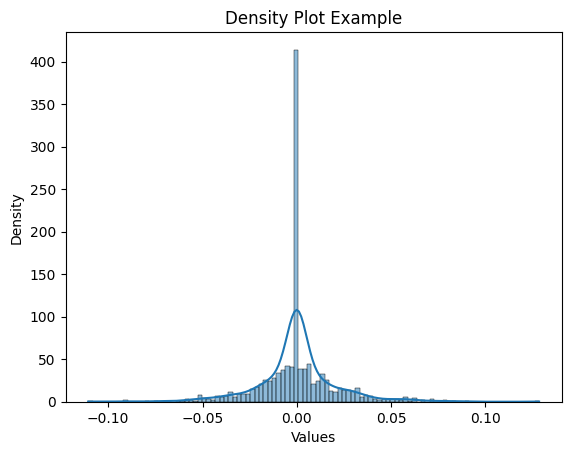

In [38]:
plot_density(df_with_weekends['log_return_1'], title='Density Plot Example', xlabel='Values')

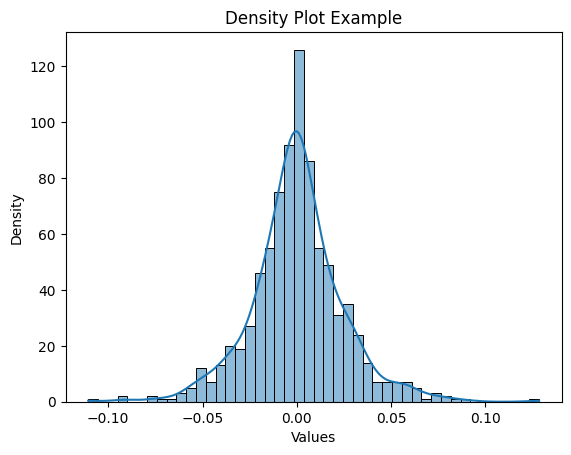

In [39]:
plot_density(df_without_weekends['log_return_1'], title='Density Plot Example', xlabel='Values')

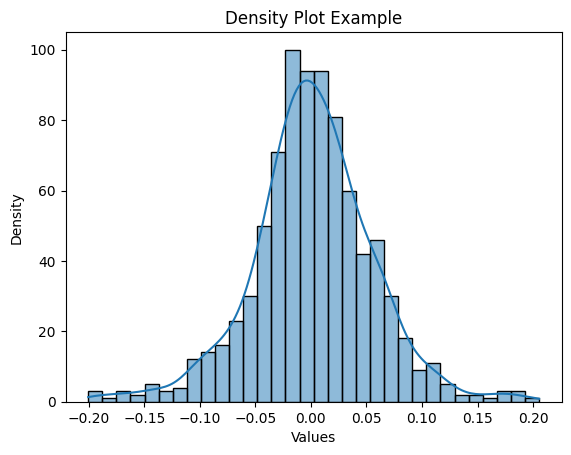

In [40]:
plot_density(df_without_weekends['log_return_5'], title='Density Plot Example', xlabel='Values')

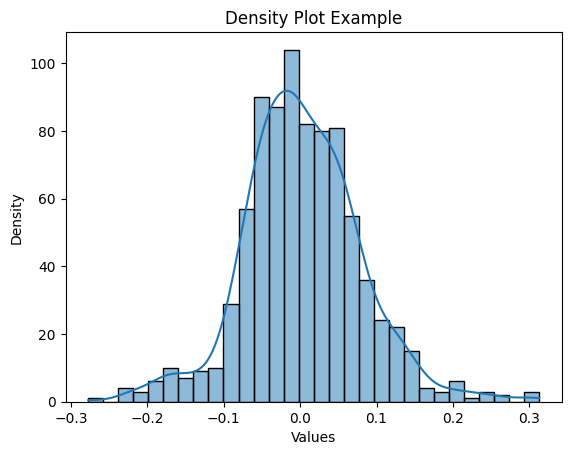

In [41]:
plot_density(df_without_weekends['log_return_10'], title='Density Plot Example', xlabel='Values')

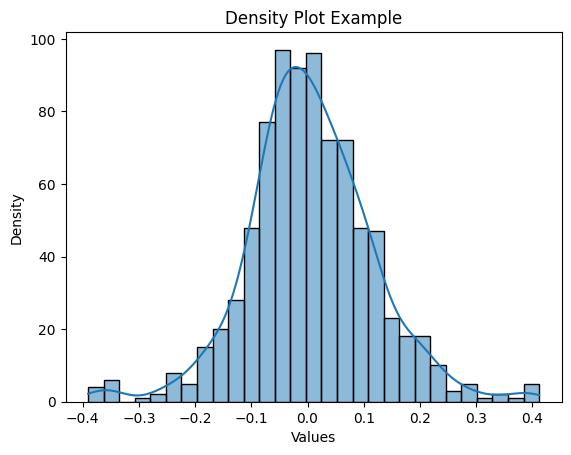

In [42]:
plot_density(df_without_weekends['log_return_20'], title='Density Plot Example', xlabel='Values')